The number of nodes in the graph is DiGraph with 82 nodes and 162 edges.


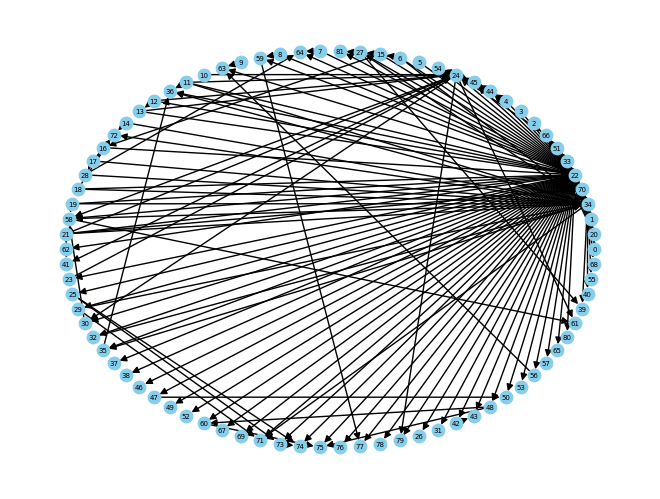

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target', create_using=nx.DiGraph())

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(G) + '.')

# Circular plot
nx.draw_circular(G, with_labels="True",node_color='skyblue', edge_color='black', node_size=80, font_size=5, arrows=True)

In [ ]:
def compute_pagerank(G, num_iterations=100, d=0.85, convergence_threshold=1e-6):
    N = G.number_of_nodes()
    page_rank = dict.fromkeys(G, 1.0 / N)  
    for i in range(num_iterations):
        new_page_rank = dict.fromkeys(G, 0)
        dangling_sum = 0 

        for node in G:
            if G.out_degree(node) == 0:
                dangling_sum += page_rank[node]

        for node in G:
            for neighbor in G.predecessors(node):
                if G.out_degree(neighbor) > 0:
                    new_page_rank[node] += d * page_rank[neighbor] / G.out_degree(neighbor)
            new_page_rank[node] += (1 - d) / N  
            new_page_rank[node] += d * dangling_sum / N 

        delta = sum(abs(new_page_rank[node] - page_rank[node]) for node in G)
        if delta < convergence_threshold:
            break

        page_rank = new_page_rank

    return page_rank

page_ranks = compute_pagerank(G)

# Print the PageRank values
for node, rank in page_ranks.items():
    print(f"Node {node}: PageRank {rank}")

In [28]:
page_rank = nx.pagerank(G, alpha = 0.85)
print(page_rank)

pr_values = page_rank.values()

{0: 0.006969865937990359, 20: 0.010030556048899127, 1: 0.008944524148499408, 34: 0.04609449247599921, 70: 0.014750249646252779, 22: 0.06007036395806656, 33: 0.010497861392200714, 51: 0.01720316019298094, 66: 0.016608962746425204, 2: 0.006969865937990359, 3: 0.006969865937990359, 4: 0.006969865937990359, 44: 0.012021795161817504, 45: 0.017130945814584377, 24: 0.030135826441378213, 54: 0.0316928720279449, 5: 0.006969865937990359, 6: 0.006969865937990359, 15: 0.008154660864295789, 27: 0.009175752956390552, 81: 0.009175752956390552, 7: 0.006969865937990359, 64: 0.01348701978011471, 8: 0.006969865937990359, 59: 0.010952945345848696, 9: 0.006969865937990359, 63: 0.0207069388900284, 10: 0.006969865937990359, 11: 0.006969865937990359, 36: 0.022304942565190656, 12: 0.006969865937990359, 13: 0.008944524148499408, 14: 0.006969865937990359, 72: 0.019680303257835586, 16: 0.010435327855135202, 17: 0.006969865937990359, 28: 0.008944524148499408, 18: 0.006969865937990359, 19: 0.006969865937990359, 58:

In [10]:

# Find the node with the highest PageRank
max_rank_node = max(page_ranks, key=page_ranks.get)
max_rank_value = page_ranks[max_rank_node]

print(f"The node with the highest PageRank is {max_rank_node} with a PageRank of {max_rank_value:.6f}")

The node with the highest PageRank is 22 with a PageRank of 0.060073


COMPARE WITH WEEK 3 AND TYPE HERE 

In [12]:
pr_values = page_ranks.values()
print(pr_values)

dict_values([0.006969639945000045, 0.010030464647849199, 0.00894436486837864, 0.04609611585363904, 0.014750470761175997, 0.060072662688070946, 0.010497962245179421, 0.01720351163722749, 0.01660934997796909, 0.006969639945000045, 0.006969639945000045, 0.006969639945000045, 0.012021956957926632, 0.017131308105307344, 0.03013661624475734, 0.031692915744619785, 0.006969639945000045, 0.006969639945000045, 0.008154474899027202, 0.009175715279444245, 0.009175715279444245, 0.006969639945000045, 0.013487200529249618, 0.006969639945000045, 0.010952967710484979, 0.006969639945000045, 0.020707300984981393, 0.006969639945000045, 0.006969639945000045, 0.022304724221593318, 0.006969639945000045, 0.00894436486837864, 0.006969639945000045, 0.01968055604989704, 0.010435284435915376, 0.006969639945000045, 0.00894436486837864, 0.006969639945000045, 0.006969639945000045, 0.025288581064651892, 0.006969639945000045, 0.008978242787106384, 0.01080324408517173, 0.007990880325417088, 0.007990880325417088, 0.0079

In [17]:
labels = list(G.nodes())
print(labels)


[0, 20, 1, 34, 70, 22, 33, 51, 66, 2, 3, 4, 44, 45, 24, 54, 5, 6, 15, 27, 81, 7, 64, 8, 59, 9, 63, 10, 11, 36, 12, 13, 14, 72, 16, 17, 28, 18, 19, 58, 21, 62, 41, 23, 25, 29, 30, 32, 35, 37, 38, 46, 47, 49, 52, 60, 67, 69, 71, 73, 74, 75, 76, 77, 78, 79, 26, 31, 42, 43, 48, 50, 53, 56, 57, 65, 80, 61, 39, 40, 55, 68]


CDF X values: [0.006969639945000045, 0.007990880325417088, 0.008154474899027202, 0.00894436486837864, 0.008978242787106384, 0.009175715279444245, 0.010030464647849199, 0.010234785999307322, 0.010435284435915376, 0.010497962245179421, 0.01080324408517173, 0.010837122003899476, 0.010952967710484979, 0.011256026379724365, 0.011387003270131348, 0.012021956957926632, 0.013487200529249618, 0.014134466049869022, 0.014652149324438625, 0.014750470761175997, 0.014783126214845609, 0.01660934997796909, 0.017131308105307344, 0.01720351163722749, 0.017300911744082798, 0.01968055604989704, 0.020707300984981393, 0.021065941811454537, 0.022304724221593318, 0.025288581064651892, 0.03013661624475734, 0.03131113855788198, 0.031692915744619785, 0.04609611585363904, 0.060072662688070946]
CDF Y values: [1.0, 0.7926829268292683, 0.5121951219512195, 0.5, 0.4634146341463415, 0.45121951219512196, 0.4268292682926829, 0.4146341463414634, 0.3780487804878049, 0.36585365853658536, 0.35365853658536583, 0.3414634146341

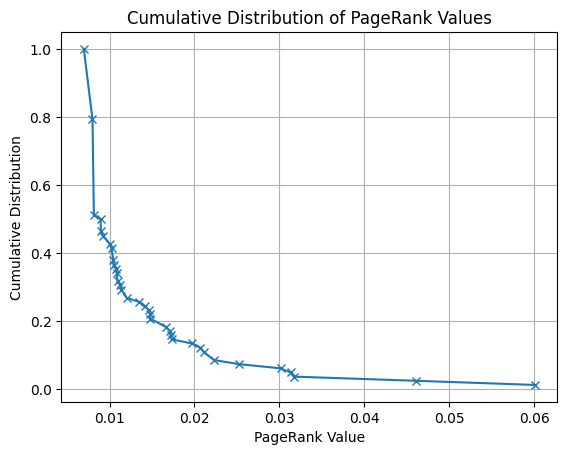

In [44]:

pagerank_centralities = compute_pagerank(G).values()

unique_values = sorted(set(pagerank_centralities))

cdf_x = unique_values

cdf_y = []

for x in cdf_x:
    y = sum(rank >= x for rank in pagerank_centralities)
    cdf_y.append(y)

total_nodes = len(pagerank_centralities)
cdf_y_normalized = [y / total_nodes for y in cdf_y]

print("CDF X values:", cdf_x)
print("CDF Y values:", cdf_y_normalized)

plt.plot(cdf_x, cdf_y_normalized, marker='x')
plt.xlabel('PageRank Value')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of PageRank Values')
plt.grid(True)
plt.show()



CDF X values: [0.006969639945000045, 0.007990880325417088, 0.008154474899027202, 0.00894436486837864, 0.008978242787106384, 0.009175715279444245, 0.010030464647849199, 0.010234785999307322, 0.010435284435915376, 0.010497962245179421, 0.01080324408517173, 0.010837122003899476, 0.010952967710484979, 0.011256026379724365, 0.011387003270131348, 0.012021956957926632, 0.013487200529249618, 0.014134466049869022, 0.014652149324438625, 0.014750470761175997, 0.014783126214845609, 0.01660934997796909, 0.017131308105307344, 0.01720351163722749, 0.017300911744082798, 0.01968055604989704, 0.020707300984981393, 0.021065941811454537, 0.022304724221593318, 0.025288581064651892, 0.03013661624475734, 0.03131113855788198, 0.031692915744619785, 0.04609611585363904, 0.060072662688070946]
CDF Y values: [82, 65, 42, 41, 38, 37, 35, 34, 31, 30, 29, 28, 26, 25, 24, 22, 21, 20, 19, 18, 17, 15, 14, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3, 2, 1]


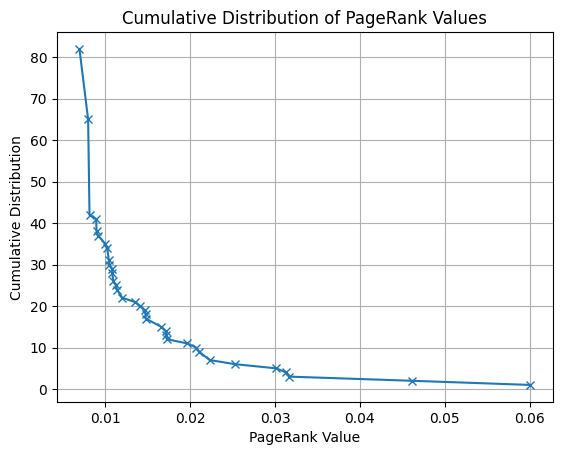

In [45]:

pagerank_centralities = compute_pagerank(G).values()

unique_values = sorted(set(pagerank_centralities))

cdf_x = unique_values

cdf_y = []
for x in cdf_x:
    y = sum(rank >= x for rank in pagerank_centralities)
    cdf_y.append(y)

print("CDF X values:", cdf_x)
print("CDF Y values:", cdf_y)

plt.plot(cdf_x, cdf_y, marker='x')
plt.xlabel('PageRank Value')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of PageRank Values')
plt.grid(True)
plt.show()